In [42]:
import tensorflow as tf
from tensorflow import keras
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [43]:
(x_train,y_train),(x_test,y_test)=keras.datasets.mnist.load_data()

In [44]:
x_train.shape

(60000, 28, 28)

In [45]:
x_test.shape

(10000, 28, 28)

In [46]:
y_train

array([5, 0, 4, ..., 5, 6, 8], dtype=uint8)

In [47]:
def plot_samples(x,y,index):
    plt.figure(figsize=(15,2))
    plt.imshow(x[index])
    plt.xlabel(y[index])

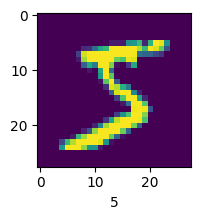

In [48]:
plot_samples(x_train,y_train,0)

In [49]:
x_train=x_train/255
x_test=x_test/255
x_train = x_train.reshape(-1, 28, 28, 1)
x_test = x_test.reshape(-1, 28, 28, 1)

In [63]:
CNN=keras.Sequential([
    #extraction
    keras.layers.Conv2D(filters=32,kernel_size=(3,3),activation='relu',input_shape=(28,28,1)),
    keras.layers.MaxPooling2D((2,2)),
    keras.layers.Conv2D(filters=64,kernel_size=(3,3),activation='relu'),
    keras.layers.MaxPooling2D((2,2)),
    #classification
    keras.layers.Flatten(),
    keras.layers.Dense(20,activation='relu'),
    keras.layers.Dense(10,activation='sigmoid')
])

In [64]:
CNN.compile(
    optimizer="adam",
    loss="sparse_categorical_crossentropy",
    metrics=["accuracy"]
)

In [65]:
CNN.fit(x_train,y_train,epochs=5)

Epoch 1/5
1875/1875 [==============================] - 36s 19ms/step - loss: 0.1804 - accuracy: 0.9436
Epoch 2/5
1875/1875 [==============================] - 34s 18ms/step - loss: 0.0559 - accuracy: 0.9827
Epoch 3/5
1875/1875 [==============================] - 37s 20ms/step - loss: 0.0391 - accuracy: 0.9878
Epoch 4/5
1875/1875 [==============================] - 34s 18ms/step - loss: 0.0300 - accuracy: 0.9901
Epoch 5/5
1875/1875 [==============================] - 38s 20ms/step - loss: 0.0236 - accuracy: 0.9925


In [66]:
CNN.evaluate(x_test,y_test)

313/313 [==============================] - 1s 4ms/step - loss: 0.0321 - accuracy: 0.9903


[0.032061848789453506, 0.9902999997138977]

313/313 [==============================] - 1s 4ms/step
Classification Report:
               precision    recall  f1-score   support

           0       1.00      0.99      1.00       980
           1       1.00      1.00      1.00      1135
           2       0.98      0.99      0.99      1032
           3       1.00      0.98      0.99      1010
           4       0.99      0.99      0.99       982
           5       0.99      0.99      0.99       892
           6       0.99      0.99      0.99       958
           7       0.98      0.99      0.99      1028
           8       0.98      0.99      0.99       974
           9       0.99      0.98      0.99      1009

    accuracy                           0.99     10000
   macro avg       0.99      0.99      0.99     10000
weighted avg       0.99      0.99      0.99     10000



Text(95.72222222222221, 0.5, 'Truth')

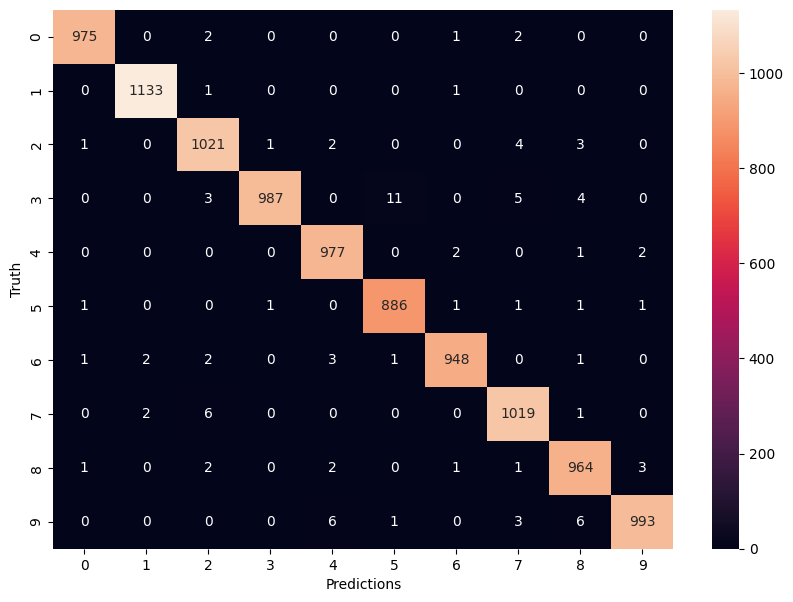

In [68]:
y_pred=[np.argmax(i) for i in (CNN.predict(x_test))]
from sklearn.metrics import confusion_matrix,classification_report
print("Classification Report:\n",classification_report(y_test,y_pred))
import seaborn as sn
cm=tf.math.confusion_matrix(labels=y_test,predictions=y_pred)
plt.figure(figsize=(10,7))
sn.heatmap(cm,annot=True,fmt='d')
plt.xlabel('Predictions')
plt.ylabel('Truth')